In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import time
import os


#command for increasing datarate
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '92aa04aa-0285-42ff-bd73-725cf0e5b758',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-22T07:46:26.688Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9120}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10475, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
#pulling out chosen data out of json dic
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now') 
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10475,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949258e+07,1.949258e+07,False,NaN,1,NaN,NaN,None,2023-09-22T07:44:00.000Z,26605.035609,1.393970e+10,10.7576,-0.068061,-1.476267,0.091672,2.278204,-10.860836,-13.152422,5.186007e+11,49.2136,5.587057e+11,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
1,1027,Ethereum,ETH,ethereum,7421,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202281e+08,1.202281e+08,True,NaN,2,NaN,NaN,None,2023-09-22T07:44:00.000Z,1591.079202,5.154167e+09,4.8362,-0.030599,-1.676189,-2.326920,-3.183732,-15.178124,-15.624014,1.912924e+11,18.1510,1.912924e+11,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
2,825,Tether USDt,USDT,tether,62641,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.319102e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-22T07:44:00.000Z,0.999879,2.129352e+10,3.8953,-0.002082,-0.014117,-0.022371,-0.012777,-0.000303,-0.062973,8.318096e+10,7.8927,8.641575e+10,None,2023-09-22T07:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 11:16:26.895798
3,1839,BNB,BNB,bnb,1632,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538476e+08,1.538476e+08,False,NaN,4,NaN,NaN,None,2023-09-22T07:44:00.000Z,210.940526,3.791331e+08,-0.9622,0.060308,-1.215980,-0.663151,-2.349214,-12.754497,-14.377501,3.245270e+10,3.0793,3.245270e+10,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-22T07:44:00.000Z,0.509849,8.476781e+08,-17.7696,0.223813,0.046174,3.014753,-1.782370,-30.036609,3.627313,2.714702e+10,2.5759,5.098488e+10,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
5,3408,USD Coin,USDC,usd-coin,14192,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577687e+10,2.577687e+10,False,NaN,6,NaN,NaN,None,2023-09-22T07:44:00.000Z,1.000072,3.125611e+09,7.4939,0.009125,0.006998,-0.006949,-0.006860,0.018328,-0.000661,2.577873e+10,2.4460,2.577873e+10,None,2023-09-22T07:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 11:16:26.895798
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411077e+11,1.411077e+11,True,NaN,7,NaN,NaN,None,2023-09-22T07:44:00.000Z,0.061643,1.972690e+08,-3.5333,0.030496,-1.444290,-0.441007,-2.069906,-18.204711,-9.217247,8.698251e+09,0.8253,8.698251e+09,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511841e+10,3.618323e+10,False,NaN,8,NaN,NaN,None,2023-09-22T07:44:00.000Z,0.245206,1.150850e+08,-0.9407,-0.146919,-1.777311,-2.544221,-5.741031,-21.965957,-16.697917,8.611234e+09,0.8171,1.103426e+10,None,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings

In [3]:
def api_runner():
    #if you want to use a global var in a function you should declare it in func az global
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '92aa04aa-0285-42ff-bd73-725cf0e5b758',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df1 = pd.json_normalize(data['data'])
    df1['Timestamp'] = pd.to_datetime('now') 
    #append is removed now we should use concat
    df = pd.concat([df, df1])
    
    '''
    #if you want to add new prices to old csv file
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now') 
    
    if not os.path.isfile(r'E:\programming prj\Automating crypto api\crypto dataframe.csv'):
        df.to_csv('crypto dataframe.csv', headers = 'column_names')
    else:
        df.to_csv('crypto dataframe.csv', mode = 'a', headers = False)
    '''

In [4]:
for i in range(5):
    api_runner()
    time.sleep(60)
    print('new dataframe aded')
    

new dataframe aded
new dataframe aded
new dataframe aded
new dataframe aded
new dataframe aded


In [30]:
df.to_csv('crypto dataframe.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10475,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19492575.00000,19492575.00000,False,NaN,1,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,26605.03561,13939702595.27164,10.75760,-0.06806,-1.47627,0.09167,2.27820,-10.86084,-13.15242,518600651990.46881,49.21360,558705747793.69995,NaN,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
1,1,1027,Ethereum,ETH,ethereum,7421,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120228095.36047,120228095.36047,True,NaN,2,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,1591.07920,5154167141.85053,4.83620,-0.03060,-1.67619,-2.32692,-3.18373,-15.17812,-15.62401,191292422008.88849,18.15100,191292422008.89001,NaN,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
2,2,825,Tether USDt,USDT,tether,62641,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83191016572.37025,86426198726.43625,True,NaN,3,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,0.99988,21293521903.74548,3.89530,-0.00208,-0.01412,-0.02237,-0.01278,-0.00030,-0.06297,83180962610.79442,7.89270,86415753780.37000,NaN,2023-09-22T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 11:16:26.895798
3,3,1839,BNB,BNB,bnb,1632,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847647.31999,153847647.31999,False,NaN,4,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,210.94053,379133127.07872,-0.96220,0.06031,-1.21598,-0.66315,-2.34921,-12.75450,-14.37750,32452703572.73121,3.07930,32452703572.73000,NaN,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,0.50985,847678109.91087,-17.76960,0.22381,0.04617,3.01475,-1.78237,-30.03661,3.62731,27147022481.25030,2.57590,50984881173.62000,NaN,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
5,5,3408,USD Coin,USDC,usd-coin,14192,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25776869809.39747,25776869809.39747,False,NaN,6,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,1.00007,3125610652.12626,7.49390,0.00913,0.00700,-0.00695,-0.00686,0.01833,-0.00066,25778726363.59299,2.44600,25778726363.59000,NaN,2023-09-22T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 11:16:26.895798
6,6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141107706383.70520,141107706383.70520,True,NaN,7,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,0.06164,197268960.72665,-3.53330,0.03050,-1.44429,-0.44101,-2.06991,-18.20471,-9.21725,8698251211.51608,0.82530,8698251211.52000,NaN,2023-09-22T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 11:16:26.895798
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35118409105.81500,36183233049.32600,False,NaN,8,NaN,NaN,NaN,2023-09-22T07:44:00.000Z,0.24521,115084980.53636,-0.94070,-0.14692,-1.77731,-2.54422,-5.74103,-21.96596,-16.69792,8611234422.61299,0.81710,11034256929.18000,NaN,20

In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\programming prj\Automating crypto api\crypto dataframe.csv')

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                                      'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03013,-1.41020,0.12572,2.27205,-10.82259,-13.10184
Ethereum,0.02706,-1.58505,-2.25743,-3.13169,-15.13174,-15.56222
Tether USDt,-0.01407,-0.01148,-0.02249,0.01647,-0.00432,-0.06248
BNB,0.08376,-1.15824,-0.61327,-2.30747,-12.74714,-14.34191
XRP,0.26376,0.11847,3.04327,-1.69252,-29.98635,3.64019
USD Coin,-0.00312,0.00802,-0.00540,0.00409,0.01109,-0.00201
Dogecoin,0.04764,-1.41615,-0.42764,-2.25643,-18.78313,-9.18696
Cardano,-0.13002,-1.74617,-2.49186,-5.67654,-21.97060,-16.67598
Solana,-0.13220,-1.39450,2.66677,-5.65667,-20.47541,14.39818


In [13]:
df3 = df2.stack()
print(df3)
type(df3)

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.03013
             quote.USD.percent_change_24h    -1.41020
             quote.USD.percent_change_7d      0.12572
             quote.USD.percent_change_30d     2.27205
             quote.USD.percent_change_60d   -10.82259
             quote.USD.percent_change_90d   -13.10184
Ethereum     quote.USD.percent_change_1h      0.02706
             quote.USD.percent_change_24h    -1.58505
             quote.USD.percent_change_7d     -2.25743
             quote.USD.percent_change_30d    -3.13169
             quote.USD.percent_change_60d   -15.13174
             quote.USD.percent_change_90d   -15.56222
Tether USDt  quote.USD.percent_change_1h     -0.01407
             quote.USD.percent_change_24h    -0.01148
             quote.USD.percent_change_7d     -0.02249
             quote.USD.percent_change_30d     0.01647
             quote.USD.percent_change_60d    -0.00432
             quote.USD.percent_change_90

pandas.core.series.Series

In [14]:
df4 = df3.to_frame(name = 'values')
print(df4)
type(df4)

                                            values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.03013
            quote.USD.percent_change_24h  -1.41020
            quote.USD.percent_change_7d    0.12572
            quote.USD.percent_change_30d   2.27205
            quote.USD.percent_change_60d -10.82259
            quote.USD.percent_change_90d -13.10184
Ethereum    quote.USD.percent_change_1h    0.02706
            quote.USD.percent_change_24h  -1.58505
            quote.USD.percent_change_7d   -2.25743
            quote.USD.percent_change_30d  -3.13169
            quote.USD.percent_change_60d -15.13174
            quote.USD.percent_change_90d -15.56222
Tether USDt quote.USD.percent_change_1h   -0.01407
            quote.USD.percent_change_24h  -0.01148
            quote.USD.percent_change_7d   -0.02249
            quote.USD.percent_change_30d   0.01647
            quote.USD.percent_change_60d  -0.00432
            quote.USD.percent_c

pandas.core.frame.DataFrame

In [29]:
df5 = df4.reset_index()
df5 = df5.rename(columns={"level_1" : "percent_change"})
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                      ['1h', '24h','7d','30d','60d','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,-0.03013
1,Bitcoin,24h,-1.41020
2,Bitcoin,7d,0.12572
3,Bitcoin,30d,2.27205
4,Bitcoin,60d,-10.82259
5,Bitcoin,90d,-13.10184
6,Ethereum,1h,0.02706
7,Ethereum,24h,-1.58505
8,Ethereum,7d,-2.25743
9,Ethereum,30d,-3.13169


C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

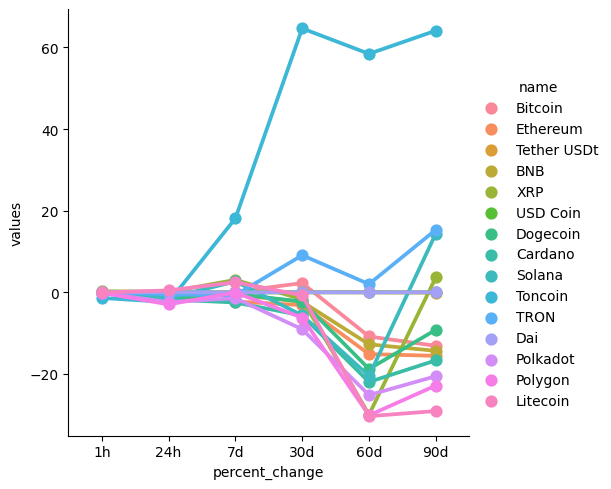

In [27]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind="point")


In [40]:
df6 = df[['name', 'quote.USD.price', 'Timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,Timestamp
0,Bitcoin,26605.03561,2023-09-22 11:16:26.895798
15,Bitcoin,26605.03561,2023-09-22 11:16:29.513312
30,Bitcoin,26609.95622,2023-09-22 11:17:31.767058
45,Bitcoin,26611.50356,2023-09-22 11:18:33.464424
60,Bitcoin,26623.06035,2023-09-22 11:19:35.418993
75,Bitcoin,26627.17259,2023-09-22 11:20:36.723170


C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

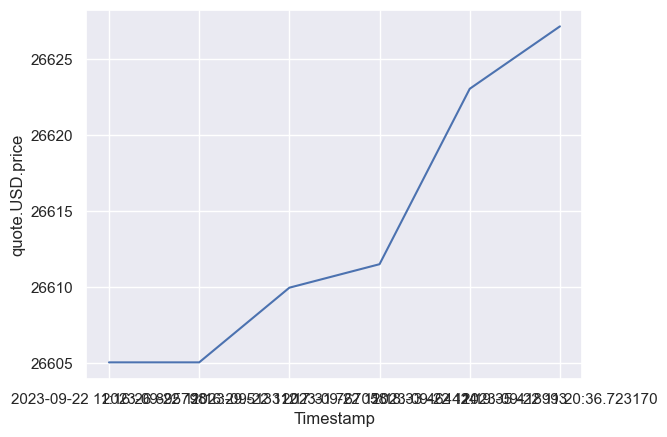

In [41]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df6)